# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

596


['tucuman',
 'hambantota',
 'loandjili',
 'cape town',
 'hermanus',
 'qasigiannguit',
 'cidreira',
 'mataura',
 'jamestown',
 'severo-kurilsk',
 'hokitika',
 'lebu',
 'rikitea',
 'rostock',
 'saskylakh',
 'ushuaia',
 'puerto ayora',
 'quelimane',
 'palabuhanratu',
 'provideniya',
 'birjand',
 'santa marinella',
 'avarua',
 'riyadh',
 'hobart',
 'kumluca',
 'busselton',
 'albany',
 'vaini',
 'hamilton',
 'jahrom',
 'louisbourg',
 'savonlinna',
 'nanortalik',
 'la peca',
 'atuona',
 'vardo',
 'jumla',
 'qaanaaq',
 'taolanaro',
 'araouane',
 'acapulco',
 'nikolskoye',
 'bluff',
 'tumannyy',
 'belushya guba',
 'kodiak',
 'port alfred',
 'xuddur',
 'punta arenas',
 'arraial do cabo',
 'urambo',
 'deputatskiy',
 'klaksvik',
 'new norfolk',
 'husavik',
 'kapaa',
 'mayo',
 'bilibino',
 'manaus',
 'maragogi',
 'panzhihua',
 'namibe',
 'coahuayana',
 'manzil kamil',
 'tuktoyaktuk',
 'bredasdorp',
 'victoria',
 'digby',
 'pevek',
 'geraldton',
 'thompson',
 'douglas',
 'amiens',
 'barrow',
 'pasi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bc7ee0f10dae2525ad6f44af80c01a07&units=imperial&q='

In [80]:
# create empty list
City= []
temp=[]
lat=[]
long=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country = []

city_counter = 1
for x in cities:
    
    #response=requests.get(query_url + x).json()     
    try:  
        response=requests.get(query_url + x).json()
        City.append(response["name"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name = response["name"]
        
        print(f"Data acqusition for {city_name}")
        city_counter = city_counter +1
    
    except (KeyError, IndexError):
        print("The city was not found.... !!")
        

#Tell when data acqusition ends
print("------------------&&------------")
print("Data Acqusition complete ")
        

Data acqusition for San Miguel de Tucumán
Data acqusition for Hambantota
Data acqusition for Loandjili
Data acqusition for Cape Town
Data acqusition for Hermanus
Data acqusition for Qasigiannguit
Data acqusition for Cidreira
Data acqusition for Mataura
Data acqusition for Jamestown
Data acqusition for Severo-Kuril'sk
Data acqusition for Hokitika
Data acqusition for Lebu
Data acqusition for Rikitea
Data acqusition for Rostock
Data acqusition for Saskylakh
Data acqusition for Ushuaia
Data acqusition for Puerto Ayora
Data acqusition for Quelimane
The city was not found.... !!
Data acqusition for Provideniya
Data acqusition for Birjand
Data acqusition for Santa Marinella
Data acqusition for Avarua
Data acqusition for Riyadh
Data acqusition for Hobart
Data acqusition for Kumluca
Data acqusition for Busselton
Data acqusition for Albany
Data acqusition for Vaini
Data acqusition for Hamilton
The city was not found.... !!
The city was not found.... !!
Data acqusition for Savonlinna
Data acqusit

Data acqusition for Hasaki
Data acqusition for Berbera
Data acqusition for Valparaíso
Data acqusition for Mahébourg
Data acqusition for Sanford
The city was not found.... !!
Data acqusition for Mana
Data acqusition for Vega de Alatorre
Data acqusition for Lagoa
Data acqusition for Shaghat
Data acqusition for Clyde River
Data acqusition for Oneonta
Data acqusition for Codrington
Data acqusition for Chernyshevskiy
Data acqusition for Savalou
Data acqusition for Ketchikan
Data acqusition for Taixing
Data acqusition for Haines Junction
The city was not found.... !!
Data acqusition for Chapais
Data acqusition for Bengkulu
Data acqusition for Buraidah
Data acqusition for Moroni
Data acqusition for Longyearbyen
Data acqusition for Diego de Almagro
The city was not found.... !!
Data acqusition for Paragominas
Data acqusition for Saýat
The city was not found.... !!
Data acqusition for West Bay
Data acqusition for Kuytun
Data acqusition for Saint-Pierre
Data acqusition for Kiryat Shmona
Data acq

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
city_data = {"City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitute": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
city_df=pd.DataFrame(city_data)

493


In [86]:
city_df.head()

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
0,San Miguel de Tucumán,AR,1596057541,64.40,-26.82,-65.22,23,89,14.99
1,Hambantota,LK,1596057616,79.59,6.12,81.12,80,86,19.10
2,Loandjili,CG,1596057616,75.20,-4.76,11.86,78,90,9.17
3,Cape Town,ZA,1596057416,57.99,-33.93,18.42,100,75,4.70
4,Hermanus,ZA,1596057547,59.00,-34.42,19.23,79,14,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
city_df.sort_values(by=['Humidity'], inplace=True, ascending=False)
city_df.head(20)

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
219,Salalah,OM,1596057153,80.60,17.02,54.09,100,75,5.82
489,Honiara,SB,1596057516,75.20,-9.43,159.95,100,75,4.70
436,Kota Belud,MY,1596057706,73.40,6.35,116.43,100,20,3.36
237,Seoul,KR,1596057297,75.20,37.57,126.98,100,90,2.10
412,Naze,JP,1596057454,78.80,28.37,129.48,100,10,3.36
226,Carnarvon,AU,1596057449,55.40,-24.87,113.63,100,0,8.05
172,Kota Kinabalu,MY,1596057483,73.40,5.97,116.07,100,20,3.36
29,Savonlinna,FI,1596057622,59.00,61.87,28.88,100,75,5.82
3,Cape Town,ZA,1596057416,57.99,-33.93,18.42,100,75,4.70
467,Tignère,CM,1596057712,64.65,7.37,12.65,99,73,0.22


In [88]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_df.loc[(city_df["Humidity"]>=100)].index
high_humidity

Int64Index([219, 489, 436, 237, 412, 226, 172, 29, 3], dtype='int64')

In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df=city_df.drop(high_humidity)
clean_city_data= {
        "City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitute": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
clean_city_data=pd.DataFrame(clean_city_data)
clean_city_data

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
0,San Miguel de Tucumán,AR,1596057541,64.40,-26.82,-65.22,23,89,14.99
1,Hambantota,LK,1596057616,79.59,6.12,81.12,80,86,19.10
2,Loandjili,CG,1596057616,75.20,-4.76,11.86,78,90,9.17
3,Cape Town,ZA,1596057416,57.99,-33.93,18.42,100,75,4.70
4,Hermanus,ZA,1596057547,59.00,-34.42,19.23,79,14,1.01
...,...,...,...,...,...,...,...,...,...
488,Ouadda,CF,1596057716,67.68,8.08,22.40,95,76,2.53
489,Honiara,SB,1596057516,75.20,-9.43,159.95,100,75,4.70
490,Pontes e Lacerda,BR,1596057555,81.91,-15.23,-59.34,38,0,7.36
491,San Jorge,AR,1596057716,57.00,-31.90,-61.86,29,0,3.00


In [90]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv(r'../output_data/clean_cities.csv')
print(len(clean_city_data))

493


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Temperature"], marker="o")

plt.title("Latitude VS. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandtemperature.png")

plt.show()
#This graph shows lower temperatures are reached at opposite spectrums of latitude. 
# The highest temperatures being reached around a latitude of 30.

## Latitude vs. Humidity Plot

In [ ]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker="o")

plt.title("Latitude VS. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandhumidity.png")

plt.show()
#This graph shows high humidity is not limited to a specific latitude. 

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker="o")

plt.title("Latitude VS. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandcloudiness.png")

plt.show()
#This graph shows latitude and cloudiness do not have a good correlation.

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker="o")

plt.title("Latitude VS. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandwindspeed.png")

plt.show()
#This graph showswind speed mostly happend away from 0 latitude. 

## Linear Regression

In [ ]:
# After each pair of plots explain what the linear regression is modeling such as any relationships you notice 
# and any other analysis you may have.

# **Optional** You will be creating multiple linear regression plots. To optimize your code, 
#write a function that creates the linear regression plots.

In [36]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
north_hem
south_hem = clean_city_data.loc[clean_city_data["Latitude"] < 0]
south_hem

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
1,Mataura,NZ,1596054790,48.85,-46.19,168.86,83,100,3.98
3,Busselton,AU,1596054528,48.00,-33.65,115.33,87,70,4.32
8,Arraial do Cabo,BR,1596054791,73.40,-22.97,-42.03,78,75,10.29
10,Vaini,TO,1596054792,68.00,-21.20,-175.20,82,20,14.99
11,Upington,ZA,1596054626,53.60,-28.45,21.26,37,0,5.32
...,...,...,...,...,...,...,...,...,...
181,Saint-Pierre,RE,1596054828,68.00,-21.34,55.48,94,75,8.05
184,Lima,PE,1596054583,62.60,-12.04,-77.03,67,90,5.82
185,Lebu,CL,1596054829,47.57,-37.62,-73.65,68,100,1.10
187,Kaitangata,NZ,1596054830,48.99,-46.28,169.85,77,100,1.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

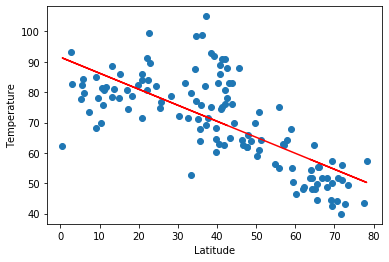

In [68]:
# # Perform a linear regression on temperature vs. latitude
x_values = north_hem['Latitude']
y_values = north_hem['Temperature']
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northtempandlat.png")
# Show plot
plt.show()
#this linear regression is showing 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

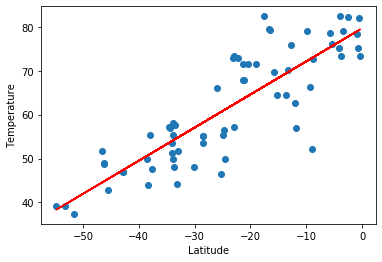

In [69]:
x_values = south_hem['Latitude']
y_values = south_hem['Temperature']
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southtempandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

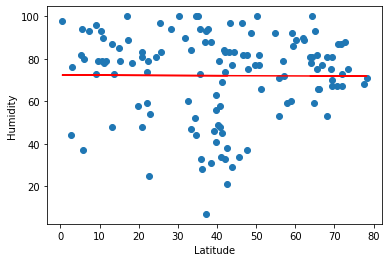

In [70]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northhumidityandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

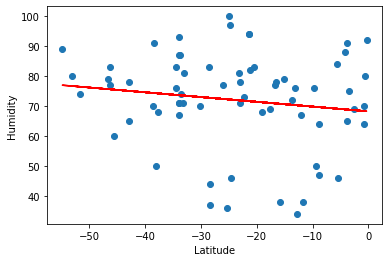

In [71]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/southhumidityandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

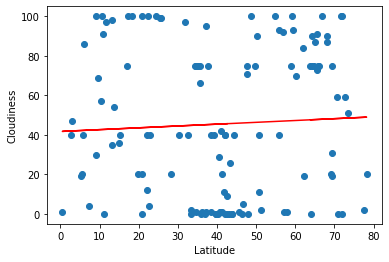

In [72]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northcloudinessandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

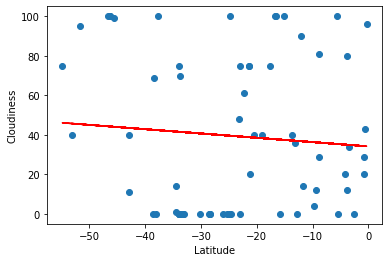

In [73]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southcloudinessandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

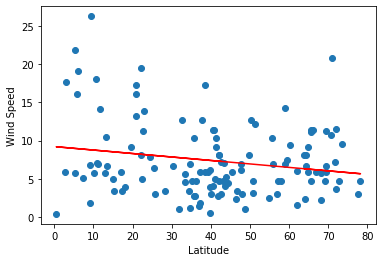

In [74]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northwindandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

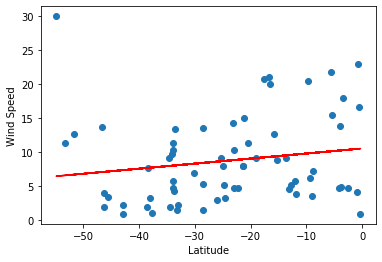

In [75]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southtwindandlat.png")
# Show plot
plt.show()
#This linear regression is showing 

In [ ]:

# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.

# # Extract latitude and longitude
# lat = geo_data["results"][0]["geometry"]["location"]["lat"]
# lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# # Print the latitude and longitude
# print('''
#     City: {0}
#     Latitude: {1}
#     Longitude: {2}
#     '''.format(target_city, lat, lng))